In [467]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [468]:
#sample = pd.read_csv('sample.csv')
train_data = pd.read_csv('train.csv',sep=";")
test_data = pd.read_csv('test.csv',sep=";")


In [469]:
#train_data.info()


In [470]:
train_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Tata Nexon 1.5 Revotorq XM,2018,850000,9500,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
1,Hyundai i20 Active SX Diesel,2018,750000,30000,Diesel,Individual,Manual,First Owner,21.19 kmpl,1396 CC,88.76 bhp,219.66nm@ 1500-2750rpm,5.0
2,Toyota Fortuner 4x2 AT,2015,1500000,80000,Diesel,Individual,Automatic,Second Owner,12.55 kmpl,2982 CC,168.5 bhp,360Nm@ 1400-3200rpm,7.0
3,Hyundai Verna 1.6 VTVT SX,2015,795000,35000,Petrol,Individual,Manual,First Owner,17.01 kmpl,1591 CC,121.3 bhp,154.9Nm@ 4200rpm,5.0
4,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0


In [471]:
train_data.describe()


,year,selling_price,km_driven,seats
count,6000.000000,6.000000e+03,6.000000e+03,5841.000000
mean,2013.814833,6.387764e+05,6.997216e+04,5.429550
std,4.026733,8.066632e+05,5.188961e+04,0.977071
min,1983.000000,3.000000e+04,1.000000e+03,2.000000
25%,2011.000000,2.557498e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.900000e+04,5.000000
max,2020.000000,1.000000e+07,1.500000e+06,14.000000


In [472]:
train_data.shape
#test_data.shape

(6000, 13)

In [473]:
train_data.isnull().sum()
test_data.isnull().sum()


Id               0
name             0
year             0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage         62
engine          62
max_power       61
torque          62
seats           62
dtype: int64

In [474]:
#train_data = train_data.drop(columns='Unnamed: 0')
#train_data = train_data.drop(columns='New_Price')

train_data = train_data.dropna()
#test_data = test_data.fillna('0')


# Reset index
train_data = train_data.reset_index(drop=True)
#test_data = test_data.reset_index(drop=True)


train_data.shape
test_data.shape


(2128, 13)

In [475]:
test_data.isnull().sum()


Id               0
name             0
year             0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage         62
engine          62
max_power       61
torque          62
seats           62
dtype: int64

In [476]:
#train_data['max_power'].value_counts()


In [477]:
#train_data['max_power'] = train_data['max_power'].fillna('74 bhp')


In [478]:
#train_data['seats'].value_counts()


In [479]:
#train_data['seats'] = train_data['seats'].fillna(5.0)


In [480]:
# Modify some fields 
train_data['mileage'] = train_data['mileage'].apply(lambda x: float(x.split()[0]))
train_data['engine'] = train_data['engine'].apply(lambda x: float(x.split()[0]))
train_data['brand'] = train_data['name'].apply(lambda x: x.split()[0])

train_data['power'] = train_data['max_power'].apply(lambda x: x.split()[0])
#train_data = train_data[train_data['power'].str.contains('\d', regex=True)]
#train_data['new_power'] = train_data['new_power'].apply(lambda x: float(x))
#train_data['year'] = train_data['year'].apply(lambda x: 2 if x>2015)

train_data = train_data.drop(columns=[ 'max_power', 'name'])

train_data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,torque,seats,brand,power
0,2018,850000,9500,Diesel,Individual,Manual,First Owner,21.50,1497.0,260Nm@ 1500-2750rpm,5.0,Tata,108.5
1,2018,750000,30000,Diesel,Individual,Manual,First Owner,21.19,1396.0,219.66nm@ 1500-2750rpm,5.0,Hyundai,88.76
2,2015,1500000,80000,Diesel,Individual,Automatic,Second Owner,12.55,2982.0,360Nm@ 1400-3200rpm,7.0,Toyota,168.5
3,2015,795000,35000,Petrol,Individual,Manual,First Owner,17.01,1591.0,154.9Nm@ 4200rpm,5.0,Hyundai,121.3
4,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.00,1969.0,400Nm,5.0,Volvo,190


In [481]:
test_data['max_power'].value_counts()


74 bhp       105
81.80 bhp     61
88.5 bhp      55
88.7 bhp      48
67.1 bhp      47
            ... 
135.1 bhp      1
53.26 bhp      1
68.4 bhp       1
110.5 bhp      1
86.7 bhp       1
Name: max_power, Length: 236, dtype: int64

In [482]:
test_data['seats'].value_counts()


5.0     1664
7.0      278
8.0       61
4.0       34
6.0       13
9.0       12
10.0       4
Name: seats, dtype: int64

In [483]:
test_data['mileage'] = test_data['mileage'].fillna(str(train_data['mileage'].mean()) + ' _')
test_data['engine'] = test_data['engine'].fillna(str(train_data['engine'].mean()) + ' _')
test_data['name'] = test_data['name'].fillna('Maruti')
test_data['max_power'] = test_data['max_power'].fillna('74 bhp')
test_data['seats'] = test_data['seats'].fillna(5.0)
#test_data['seats'] = test_data['seats'].fillna(int(train_data['seats'].mean()))

In [484]:
test_data.isnull().sum()

Id               0
name             0
year             0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque          62
seats            0
dtype: int64

In [485]:
test_data['mileage'] = test_data['mileage'].apply(lambda x: str(x))
test_data['engine'] = test_data['engine'].apply(lambda x: str(x))
test_data['brand'] = test_data['name'].apply(lambda x: str(x))
test_data['max_power'] = test_data['max_power'].apply(lambda x: str(x))

In [486]:
test_data['mileage'] = test_data['mileage'].apply(lambda x: float(x.split()[0]))
test_data['engine'] = test_data['engine'].apply(lambda x: float(x.split()[0]))
test_data['brand'] = test_data['name'].apply(lambda x: x.split()[0])

test_data['power'] = test_data['max_power'].apply(lambda x: x.split()[0])
#train_data = train_data[train_data['power'].str.contains('\d', regex=True)]
#train_data['new_power'] = train_data['new_power'].apply(lambda x: float(x))
#test_data['year'] = test_data['year'].apply(lambda x: 2020-x)


test_data = test_data.drop(columns=[ 'max_power', 'name'])

test_data.head()

,Id,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,torque,seats,brand,power
0,1,2016,11000,Petrol,Dealer,Automatic,First Owner,14.30,1598.0,153Nm@ 3800rpm,5.0,Skoda,103.5
1,2,2017,35000,Petrol,Individual,Manual,First Owner,17.80,1497.0,145Nm@ 4600rpm,5.0,Honda,117.3
2,3,2014,80000,Petrol,Individual,Manual,First Owner,19.10,1197.0,114Nm@ 4000rpm,5.0,Hyundai,82
3,4,2014,145241,Diesel,Individual,Manual,First Owner,12.05,2179.0,290Nm@ 1800-2800rpm,7.0,Mahindra,120
4,5,2015,92651,Diesel,Dealer,Manual,First Owner,21.70,1498.0,215Nm@ 1750-2500rpm,5.0,Ford,98.96


In [487]:
train_data.describe()

,year,selling_price,km_driven,mileage,engine,seats
count,5840.000000,5.840000e+03,5.840000e+03,5840.000000,5840.000000,5840.000000
mean,2013.989555,6.501629e+05,6.944431e+04,19.389591,1464.471404,5.429110
std,3.852886,8.139088e+05,5.215208e+04,4.054167,508.287421,0.976575
min,1994.000000,3.000000e+04,1.000000e+03,0.000000,624.000000,2.000000
25%,2012.000000,2.700000e+05,3.500000e+04,16.780000,1197.000000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,5.000000
75%,2017.000000,6.900000e+05,9.662500e+04,22.320000,1582.000000,5.000000
max,2020.000000,1.000000e+07,1.500000e+06,42.000000,3604.000000,14.000000


# Data Visualization

In [488]:
#new_train = train_data

In [489]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           5840 non-null   int64  
 1   selling_price  5840 non-null   int64  
 2   km_driven      5840 non-null   int64  
 3   fuel           5840 non-null   object 
 4   seller_type    5840 non-null   object 
 5   transmission   5840 non-null   object 
 6   owner          5840 non-null   object 
 7   mileage        5840 non-null   float64
 8   engine         5840 non-null   float64
 9   torque         5840 non-null   object 
 10  seats          5840 non-null   float64
 11  brand          5840 non-null   object 
 12  power          5840 non-null   object 
dtypes: float64(3), int64(3), object(7)
memory usage: 593.2+ KB


# price

D:\ana\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distributional of selling price')

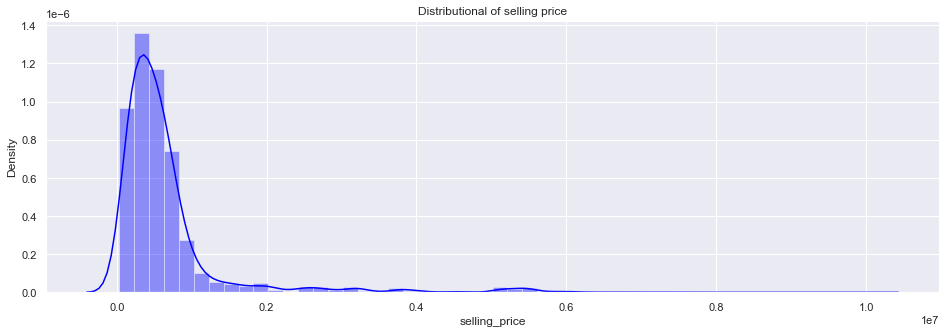

In [52]:
f, axes = plt.subplots(1,1, figsize = (16, 5))
g1 = sns.distplot(train_data["selling_price"], color="blue",ax = axes)
plt.title("Distributional of selling price")

# Fuel Type

In [24]:
train_data['fuel'].describe()


count       5840
unique         4
top       Diesel
freq        3192
Name: fuel, dtype: object

In [25]:
train_data['fuel'].value_counts()

Diesel    3192
Petrol    2582
CNG         41
LPG         25
Name: fuel, dtype: int64

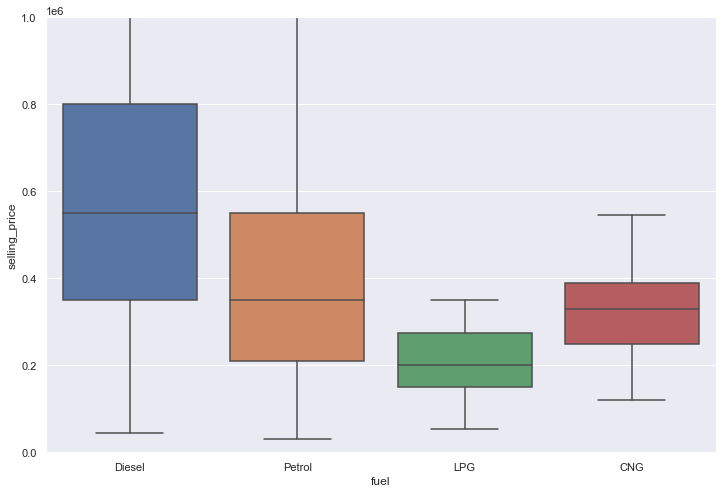

In [26]:
var = 'fuel'
data = pd.concat([train_data['selling_price'], train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x=var, y="selling_price", data=data)
fig.axis(ymin=0, ymax=1000000);

D:\ana\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 81.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\ana\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 87.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='fuel', ylabel='selling_price'>

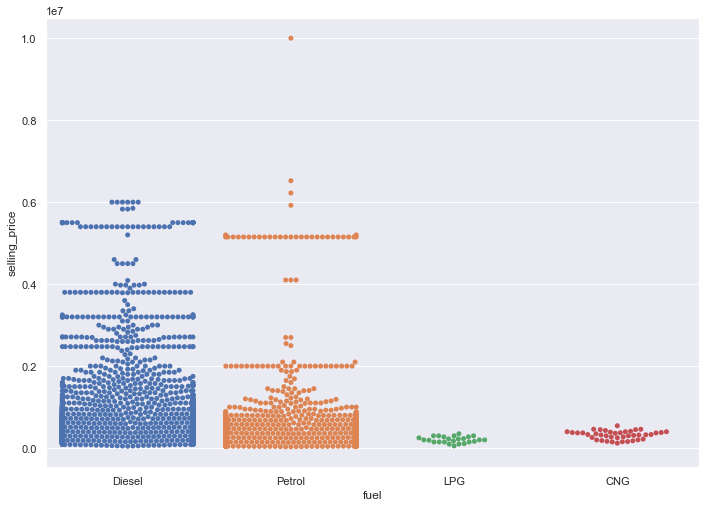

In [680]:
var = 'fuel'
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.swarmplot(x = var, y ='selling_price', data = train_data)

D:\ana\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fuel', ylabel='selling_price'>

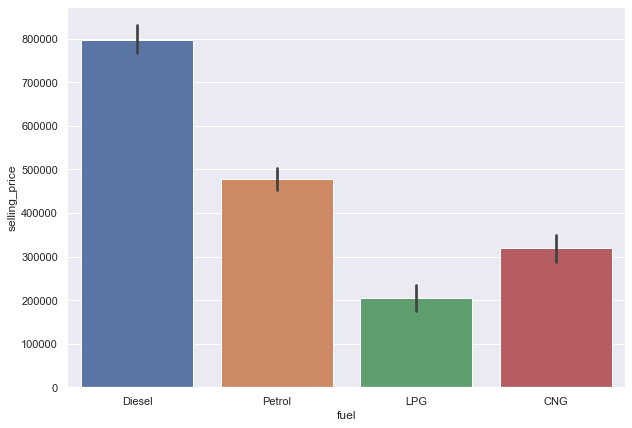

In [681]:
plt.figure(figsize=(10, 7))
sns.barplot('fuel', 'selling_price', data=train_data)

# year

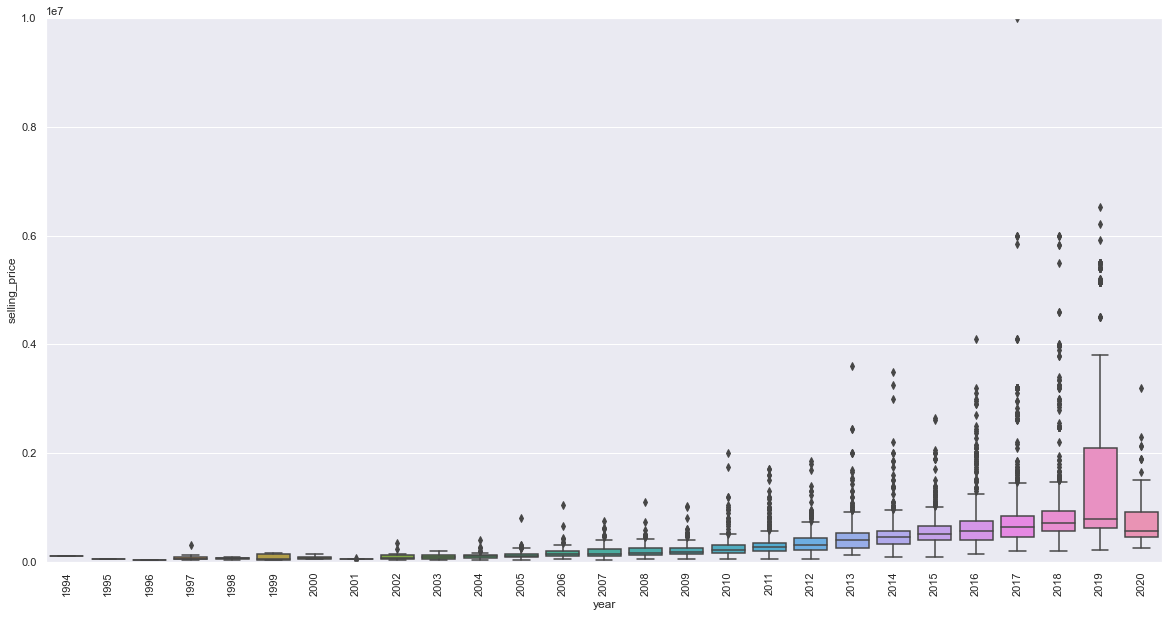

In [346]:
var = 'year'
data = pd.concat([train_data['selling_price'], train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x=var, y="selling_price", data=data)
fig.axis(ymin=0, ymax=10000000);
plt.xticks(rotation=90);

D:\ana\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 864x648 with 0 Axes>

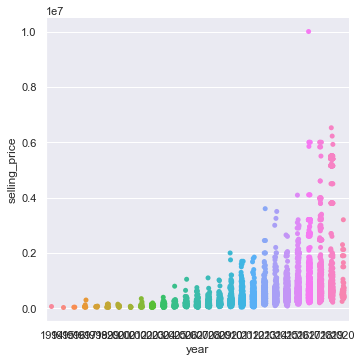

In [683]:
plt.figure(figsize=(12, 9))
sns.catplot('year', 'selling_price', data=train_data)

D:\ana\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='selling_price'>

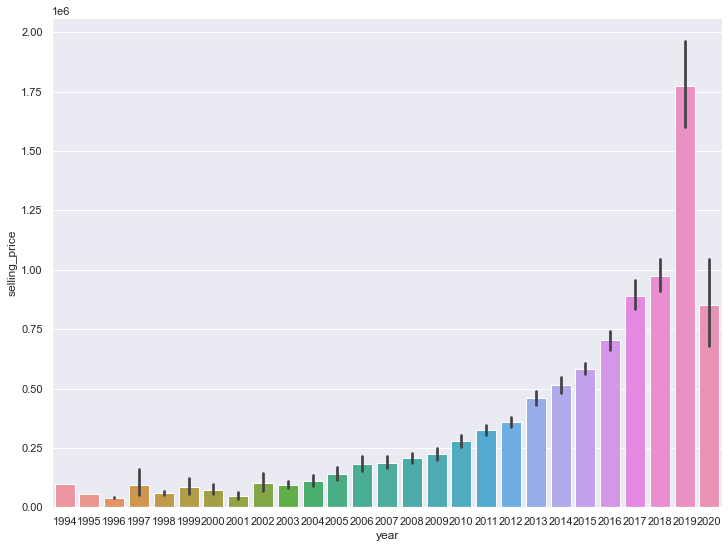

In [684]:
plt.figure(figsize=(12, 9))
sns.barplot('year', 'selling_price', data=train_data)

D:\ana\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='count'>

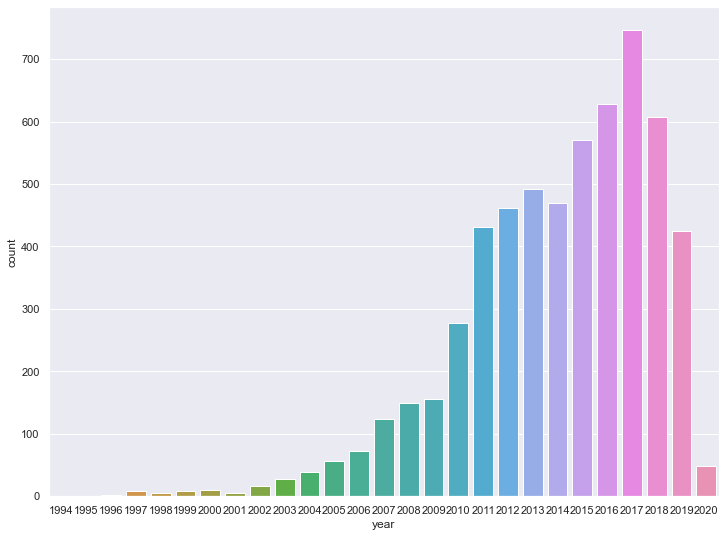

In [685]:
plt.figure(figsize=(12, 9))
sns.countplot('year', data=train_data)

# owner

D:\ana\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='owner', ylabel='count'>

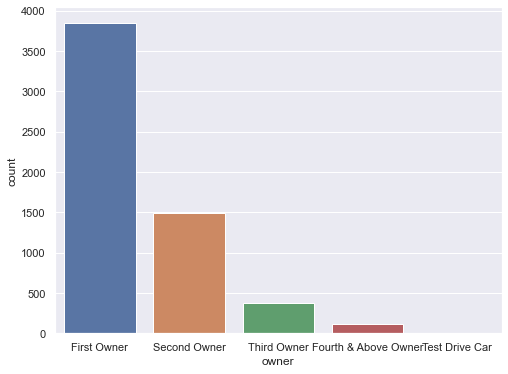

In [686]:
plt.figure(figsize=(8, 6))
sns.countplot('owner', data=train_data)

<AxesSubplot:xlabel='owner', ylabel='selling_price'>

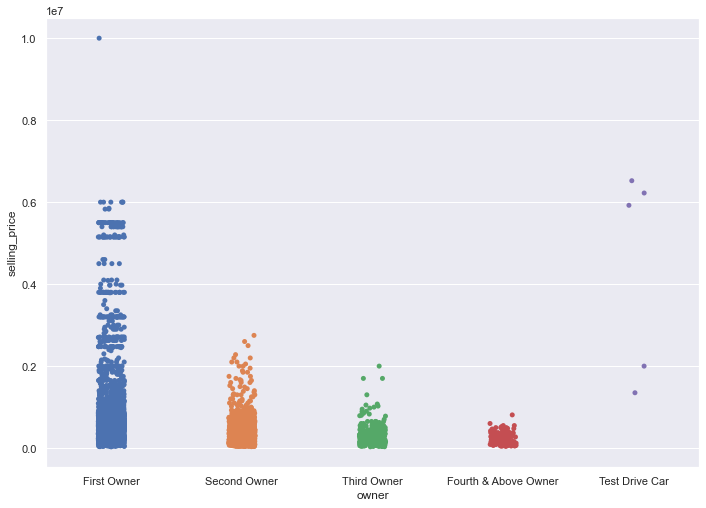

In [433]:
var = 'owner'
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.stripplot(x = var, y ='selling_price', data = train_data) 

# brand

<Figure size 1440x720 with 0 Axes>

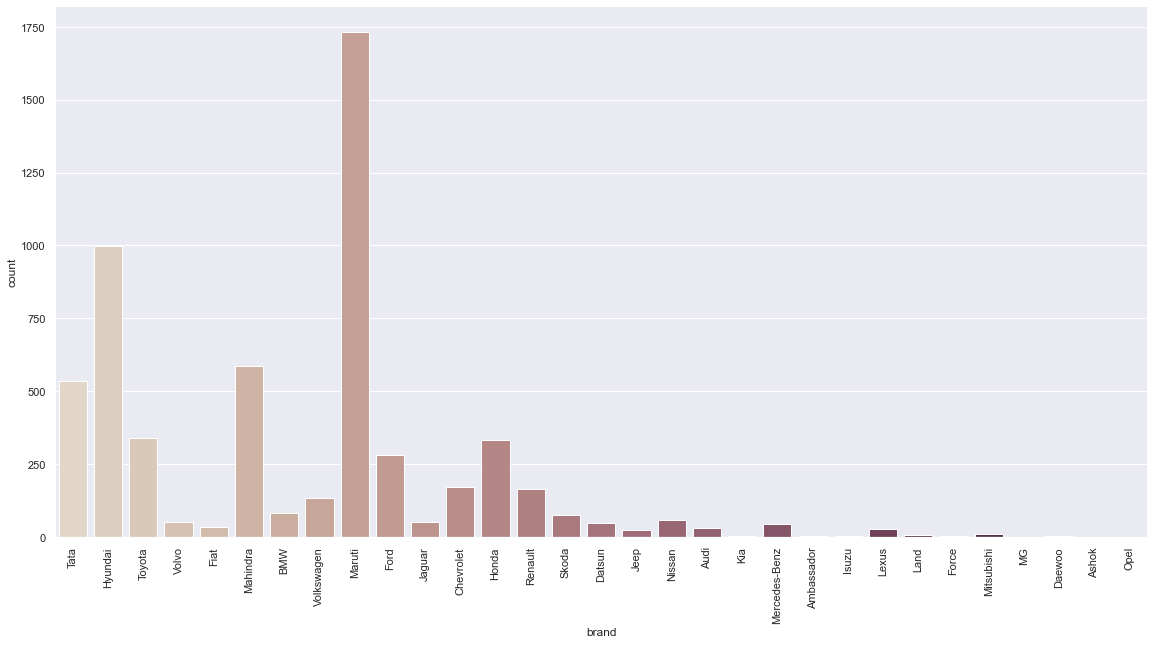

In [688]:
var = "brand"
plt.figure(figsize=(20, 10))
sns.catplot(x=var, kind="count", palette="ch:.25", height=8, aspect=2, data=train_data);
plt.xticks(rotation=90);

<function matplotlib.pyplot.show(close=None, block=None)>

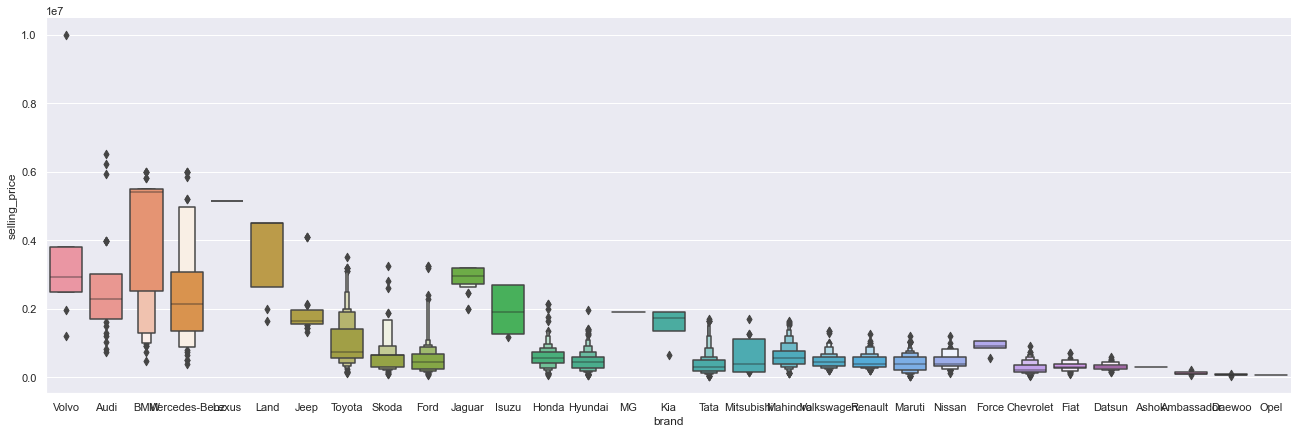

In [689]:
sns.catplot(y='selling_price',x=var,data= train_data.sort_values('selling_price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

# Transmission

D:\ana\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 720x504 with 0 Axes>

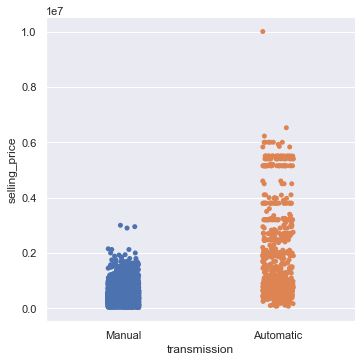

In [690]:
plt.figure(figsize=(10, 7))
sns.catplot('transmission', 'selling_price', data=train_data)

D:\ana\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='transmission', ylabel='count'>

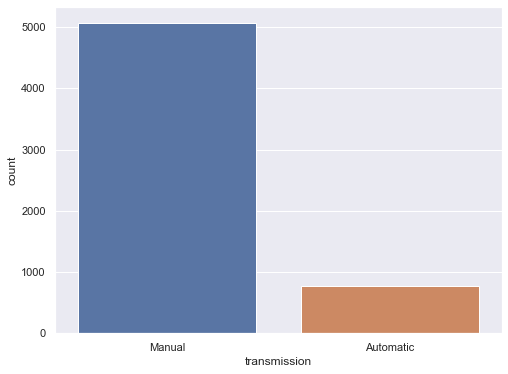

In [691]:
plt.figure(figsize=(8, 6))
sns.countplot('transmission', data=train_data)

D:\ana\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='transmission', ylabel='selling_price'>

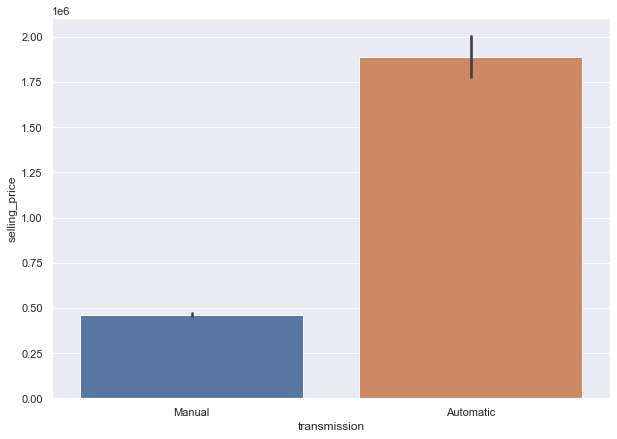

In [692]:
plt.figure(figsize=(10, 7))
sns.barplot('transmission', 'selling_price', data=train_data)

# km_driven

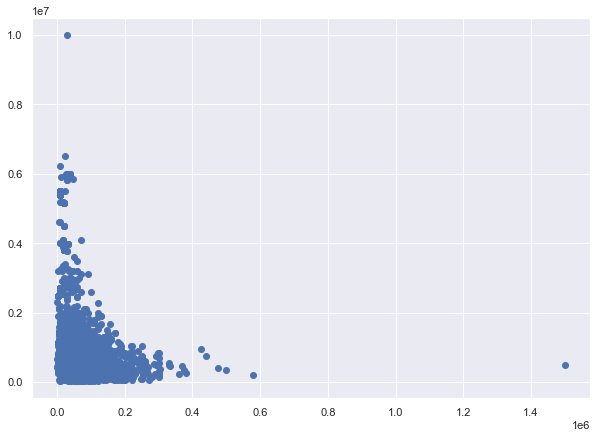

In [347]:
plt.figure(figsize=(10, 7))
plt.scatter(train_data['km_driven'], train_data['selling_price'])

<AxesSubplot:xlabel='km_driven'>

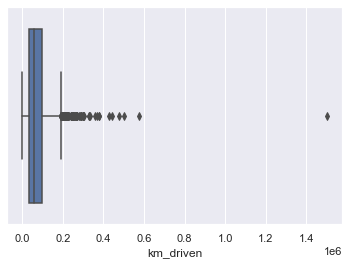

In [110]:
sns.boxplot(x=train_data['km_driven'])

In [490]:
train_data['km_driven'][train_data['km_driven']>600000].count()
#a= train_data['seats']
#a[a>800000].count()

1

# bỏ outlier km_driven

In [491]:
out_row=np.where(train_data['km_driven']>=600000)
for i in out_row:
    train_data.drop(i, inplace=True)

# Generating new feature 'is_kilometers_driven_less_70k' would be useful

In [492]:
train_data['fuel'].value_counts()
#new_train['transmission'].value_counts()
#new_train['brand'].value_counts()
#new_train['owner'].value_counts()
#new_train['seller_type'].value_counts()seller_type

Diesel    3191
Petrol    2582
CNG         41
LPG         25
Name: fuel, dtype: int64

In [493]:
# convert the values of 'fuel' column to numerical format
#z = lambda x: 0 if x == 'Diesel' else (1 if x == 'Petrol' else (2 if x == 'CNG' else(3 if x == 'LPG'else 4)))
#train_data['fuel'] = train_data['fuel'].apply(z)

In [494]:
# convert the values of 'fuel' column to numerical format
#z = lambda x: 0 if x == 'Diesel' else (1 if x == 'Petrol' else (2 if x == 'CNG' else(3 if x == 'LPG'else 4)))
#test_data['fuel'] = test_data['fuel'].apply(z)

In [495]:
Fuel_type = train_data[['fuel']]
Fuel_type = pd.get_dummies(Fuel_type,drop_first=True)
Fuel_type.head()

,fuel_Diesel,fuel_LPG,fuel_Petrol
0,1,0,0
1,1,0,0
2,1,0,0
3,0,0,1
4,1,0,0


In [496]:
Fuel_type_test = test_data[['fuel']]
Fuel_type_test = pd.get_dummies(Fuel_type_test,drop_first=True)
Fuel_type_test.head()

,fuel_Diesel,fuel_LPG,fuel_Petrol
0,0,0,1
1,0,0,1
2,0,0,1
3,1,0,0
4,1,0,0


# owner

In [497]:
train_data.replace({'owner':{'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3, 'Fourth & Above Owner': 4,'Test Drive Car':1}}, inplace=True)
train_data.head()


,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,torque,seats,brand,power
0,2018,850000,9500,Diesel,Individual,Manual,1,21.50,1497.0,260Nm@ 1500-2750rpm,5.0,Tata,108.5
1,2018,750000,30000,Diesel,Individual,Manual,1,21.19,1396.0,219.66nm@ 1500-2750rpm,5.0,Hyundai,88.76
2,2015,1500000,80000,Diesel,Individual,Automatic,2,12.55,2982.0,360Nm@ 1400-3200rpm,7.0,Toyota,168.5
3,2015,795000,35000,Petrol,Individual,Manual,1,17.01,1591.0,154.9Nm@ 4200rpm,5.0,Hyundai,121.3
4,2019,3800000,20000,Diesel,Individual,Automatic,1,18.00,1969.0,400Nm,5.0,Volvo,190


In [498]:
train_data['owner'].value_counts()


1    3854
2    1495
3     377
4     113
Name: owner, dtype: int64

In [499]:
test_data.replace({'owner':{'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3, 'Fourth & Above Owner': 4,'Test Drive Car':1}}, inplace=True)
test_data.head()


,Id,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,torque,seats,brand,power
0,1,2016,11000,Petrol,Dealer,Automatic,1,14.30,1598.0,153Nm@ 3800rpm,5.0,Skoda,103.5
1,2,2017,35000,Petrol,Individual,Manual,1,17.80,1497.0,145Nm@ 4600rpm,5.0,Honda,117.3
2,3,2014,80000,Petrol,Individual,Manual,1,19.10,1197.0,114Nm@ 4000rpm,5.0,Hyundai,82
3,4,2014,145241,Diesel,Individual,Manual,1,12.05,2179.0,290Nm@ 1800-2800rpm,7.0,Mahindra,120
4,5,2015,92651,Diesel,Dealer,Manual,1,21.70,1498.0,215Nm@ 1750-2500rpm,5.0,Ford,98.96


In [500]:
transmission = train_data[['transmission']]
transmission = pd.get_dummies(data=transmission,drop_first=True)
transmission.head()

,transmission_Manual
0,1
1,1
2,0
3,1
4,0


In [501]:
transmission_test = test_data[['transmission']]
transmission_test = pd.get_dummies(data=transmission_test,drop_first=True)
transmission_test.head()

,transmission_Manual
0,0
1,1
2,1
3,1
4,1


In [502]:
seller_type = train_data[['seller_type']]
seller_type = pd.get_dummies(seller_type,drop_first=True)
seller_type.head()

,seller_type_Individual,seller_type_Trustmark Dealer
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [503]:
seller_type_test = test_data[['seller_type']]
seller_type_test = pd.get_dummies(seller_type_test,drop_first=True)
seller_type_test.head()

,seller_type_Individual,seller_type_Trustmark Dealer
0,0,0
1,1,0
2,1,0
3,1,0
4,0,0


In [504]:
train_data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,torque,seats,brand,power
0,2018,850000,9500,Diesel,Individual,Manual,1,21.50,1497.0,260Nm@ 1500-2750rpm,5.0,Tata,108.5
1,2018,750000,30000,Diesel,Individual,Manual,1,21.19,1396.0,219.66nm@ 1500-2750rpm,5.0,Hyundai,88.76
2,2015,1500000,80000,Diesel,Individual,Automatic,2,12.55,2982.0,360Nm@ 1400-3200rpm,7.0,Toyota,168.5
3,2015,795000,35000,Petrol,Individual,Manual,1,17.01,1591.0,154.9Nm@ 4200rpm,5.0,Hyundai,121.3
4,2019,3800000,20000,Diesel,Individual,Automatic,1,18.00,1969.0,400Nm,5.0,Volvo,190


In [505]:
final_train = pd.concat([train_data, Fuel_type, transmission, seller_type], axis=1)
final_train.drop(columns=['fuel', 'seller_type', 'transmission','brand','torque'], inplace=True)
final_train.head()

,year,selling_price,km_driven,owner,mileage,engine,seats,power,fuel_Diesel,fuel_LPG,fuel_Petrol,transmission_Manual,seller_type_Individual,seller_type_Trustmark Dealer
0,2018,850000,9500,1,21.50,1497.0,5.0,108.5,1,0,0,1,1,0
1,2018,750000,30000,1,21.19,1396.0,5.0,88.76,1,0,0,1,1,0
2,2015,1500000,80000,2,12.55,2982.0,7.0,168.5,1,0,0,0,1,0
3,2015,795000,35000,1,17.01,1591.0,5.0,121.3,0,0,1,1,1,0
4,2019,3800000,20000,1,18.00,1969.0,5.0,190,1,0,0,0,1,0


In [506]:
test_data = pd.concat([test_data, Fuel_type_test, transmission_test, seller_type_test], axis=1)
test_data.drop(columns=['fuel', 'seller_type', 'transmission','torque','brand','Id'], inplace=True)
test_data.head()

,year,km_driven,owner,mileage,engine,seats,power,fuel_Diesel,fuel_LPG,fuel_Petrol,transmission_Manual,seller_type_Individual,seller_type_Trustmark Dealer
0,2016,11000,1,14.30,1598.0,5.0,103.5,0,0,1,0,0,0
1,2017,35000,1,17.80,1497.0,5.0,117.3,0,0,1,1,1,0
2,2014,80000,1,19.10,1197.0,5.0,82,0,0,1,1,1,0
3,2014,145241,1,12.05,2179.0,7.0,120,1,0,0,1,1,0
4,2015,92651,1,21.70,1498.0,5.0,98.96,1,0,0,1,0,0


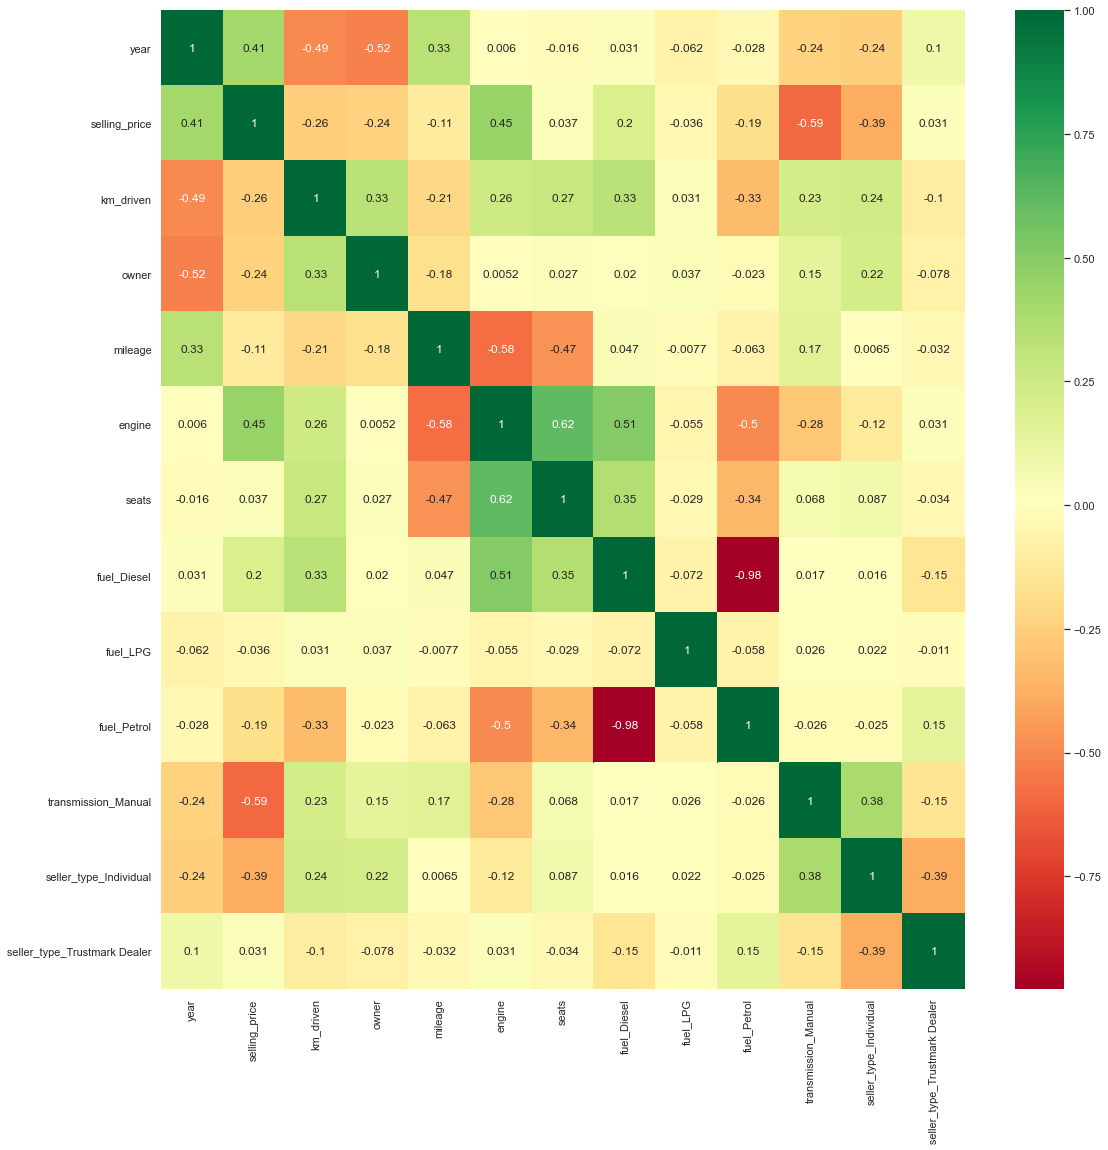

In [507]:
plt.figure(figsize=(18,18))
sns.heatmap(final_train.corr(),annot=True,cmap='RdYlGn')

plt.show()

In [508]:
# Find most important features relative to target Price
print("Find most important features relative to Price-target")
corr = train_data.corr()
corr.sort_values(["selling_price"], ascending = False, inplace = True)
print(corr.selling_price)

Find most important features relative to Price-target
selling_price    1.000000
engine           0.450991
year             0.410287
seats            0.037123
mileage         -0.113871
owner           -0.236592
km_driven       -0.255016
Name: selling_price, dtype: float64


# Build model

In [509]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [510]:
final_train.head()

,year,selling_price,km_driven,owner,mileage,engine,seats,power,fuel_Diesel,fuel_LPG,fuel_Petrol,transmission_Manual,seller_type_Individual,seller_type_Trustmark Dealer
0,2018,850000,9500,1,21.50,1497.0,5.0,108.5,1,0,0,1,1,0
1,2018,750000,30000,1,21.19,1396.0,5.0,88.76,1,0,0,1,1,0
2,2015,1500000,80000,2,12.55,2982.0,7.0,168.5,1,0,0,0,1,0
3,2015,795000,35000,1,17.01,1591.0,5.0,121.3,0,0,1,1,1,0
4,2019,3800000,20000,1,18.00,1969.0,5.0,190,1,0,0,0,1,0


In [511]:
X = final_train.drop(columns=['selling_price','mileage','owner'])
Y = final_train['selling_price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X.shape, final_train.shape)
print (x_test.shape, x_train.shape)
print(test_data.shape)

(5839, 11) (5839, 14)
(1168, 11) (4671, 11)
(2128, 13)


In [512]:
test_data.isnull().sum()

year                            0
km_driven                       0
owner                           0
mileage                         0
engine                          0
seats                           0
power                           0
fuel_Diesel                     0
fuel_LPG                        0
fuel_Petrol                     0
transmission_Manual             0
seller_type_Individual          0
seller_type_Trustmark Dealer    0
dtype: int64

In [513]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)
y_pred= linear_reg.predict(x_test)
print("Accuracy on Traing set: ",linear_reg.score(x_train,y_train))
print("Accuracy on Testing set: ",linear_reg.score(x_test,y_test))

Accuracy on Traing set:  0.6752341920751541
Accuracy on Testing set:  0.7017773952404924


In [514]:
print('MSE:', str(metrics.mean_squared_error(y_true=y_test, y_pred=y_pred,squared=False)))

MSE: 479195.80731113465


In [515]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=150)
rf_reg.fit(x_train, y_train)
#y_pred= rf_reg.predict(test_data)
y_pred_on_train_data= rf_reg.predict(x_test)

print("Accuracy on Traing set: ",rf_reg.score(x_train,y_train))
print("Accuracy on Testing set: ",rf_reg.score(x_test,y_test))
#print(y_pred[:10])
#print(y_test[:10])

Accuracy on Traing set:  0.9939403353251021
Accuracy on Testing set:  0.9775985439539326


In [516]:
x_pred_on_train_data= rf_reg.predict(x_train)
print('RMSE:', str(metrics.mean_squared_error(y_true=y_train, y_pred=x_pred_on_train_data,squared=False)))

RMSE: 62051.22231508827


In [517]:
print('RMSE:', str(metrics.mean_squared_error(y_true=y_test, y_pred=y_pred_on_train_data,squared=False)))

RMSE: 131335.1134958226


In [639]:
y_pred= rf_reg.predict(test_data.drop(columns = ['mileage','owner']))
ex =  pd.DataFrame(y_pred,columns=["Predicted"], index=[i for i in range(1,y_pred.shape[0]+1)] )
ex.to_csv("oldpredict6.csv")

In [640]:
ex.to_csv("oldpredict6.csv")

In [526]:
import numpy as np
import pandas as pd
from sklearn import datasets
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [527]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [528]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))

results = []
names = []
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

for name, model in pipelines:
    kfold = KFold(n_splits=6)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -207960191757.659393 (27011784401.132179)
ScaledLASSO: -207960189113.414337 (27011954877.357605)
ScaledEN: -228658488768.446808 (38698672743.406906)
ScaledKNN: -52701504999.216393 (25515029851.613197)
ScaledCART: -39621943328.381859 (12795580147.904623)
ScaledGBM: -34803393114.353966 (16676365570.170916)


In [579]:
rf_reg = GradientBoostingRegressor(learning_rate=0.1,n_estimators=1000, criterion='mse', max_depth=5)
rf_reg.fit(x_train, y_train)

y_pred_on_train_data= rf_reg.predict(x_test)

print('RMSE:', str(metrics.mean_squared_error(y_true=y_test, y_pred=y_pred_on_train_data,squared=False)))

RMSE: 108276.91799431994


In [576]:
x_pred_on_train_data= rf_reg.predict(x_train)
print('RMSE:', str(metrics.mean_squared_error(y_true=y_train, y_pred=x_pred_on_train_data,squared=False)))

RMSE: 41906.3940262191


In [577]:
y_pred= rf_reg.predict(test_data.drop(columns = ['mileage','owner']))
ex =  pd.DataFrame(y_pred,columns=["Predicted"], index=[i for i in range(1,y_pred.shape[0]+1)] )
ex.to_csv("oldpredict9.csv")

In [242]:
y_test.mean()

650457.6202910959

In [233]:
print(y_test)

4583     400000
177      150000
167      160000
3723    1040000
2339     360000
         ...   
1551     650000
5179    1050000
1146     450000
3528     300000
2092     900000
Name: selling_price, Length: 2336, dtype: int64


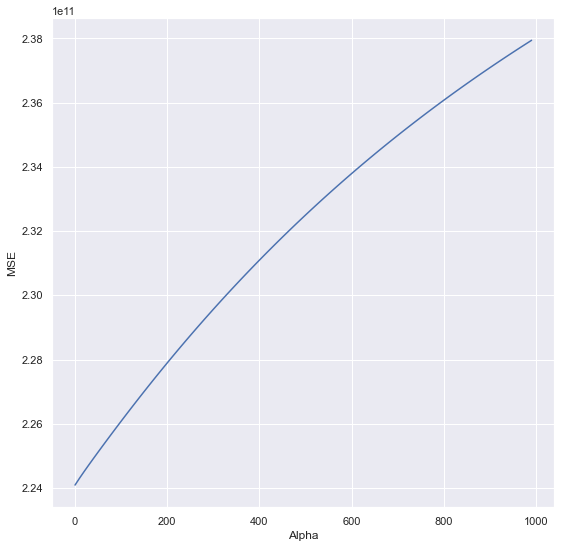

In [142]:
fig, ax = plt.subplots(figsize=(9, 9))
ax = sns.lineplot(x='Alpha', y='MSE', data=df)